# Intro to Monte Carlo Simulation
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2924739/

1. The first instance of Monte Carlo Simulations
- random sampling and statistical modeling is at its basis
- used in many scenarios: 
    - flipping a coin
    - weather prediction
    - ...
    - recession modeling
- 18th century - Georges Louis LeClerc, a French scientist
    - Buffon's needle considered as the 1st instance: calculating the probability of a needle intersecting a line on a lined background assuming the needle has the length of the difference between 2 lines
- from then on simulation was increasingly used as an experimental means in analysing data, confirming theory, stats, maths, etc
- since the 19th century, simulations have changed from having a determinstic approach to more probabilstic
- Its name comes from the 2nd World War when the Americans John von Neumann and Stanislaw Ulam investigated the properties of neutron travel through radiation shielding and named the method after the Monte Carlos Casino in Monaco
- They, along with others, used simulation for many other nuclear weapon problems and established most of the fundamental methods of Monte Carlo simulation

2. Defining a model
- Consider:
    - what is the output?
        - In a weather simulation we might want to predict temepartures, wind speed, precipitation, etc
    - what this output will be used for? 
        - picnic planning requires specifying which days rain is likely
        - for a farmer knowing how much rain it will fall is more important
    - how accurate outputs can/must be? 
        - input measurements must be defined well
        - Ex: forecasts in areas in the middle of densely sampled regions (lots of weather stations, satellites, balloons, etc.) are more accurate than those near poorly sampled regions
    - how can you process the inputs to get the outputs?
        - a Monte Carlo simulation always involves an element of randomness 
        - allow for a measurement error in the inputs
        - by running a Monte Carlo forecast for a given area multiple times, we can determine the variability of the forecast for the measured inputs
    

3. Sampling from Probability Density Functions, PDFs

- the PDFs are at its basis
    - functions that define the range of possibilities and the relative probability of those possibilities for a given step in the simulation
- for sampling purposes we often use the cumulative distribution function, CDFs
    - tells us the probability that a number sampled randomly from the PDF will be <= X     
- Uniform distribution
    - it gives equal probability to every number in a range of 2 real numbers
    - CDF is an integral of the PDF

4. (Pseudo) Random Number Generators

- a deterministic computer algorithm that produces a series of numbers that share many of the characteristic of truly random samples
- A more modern RNG, the Mersenne Twister, is complicated but fast

5. Sampling From The Exponential Distribution Using The Inversion Method

- The inversion method is one method to convert a uniform distribution sample to a sample from another distribution
- the exponential distribution usually measures the distance between 2 events
- below are the PDF of exponential distribtuion where lambda adjusts the exponential decay and the CDF (on the right)

<div>
<img src="exponential_distribution.jpg" align="left" width="400"/>
</div>

<div>
<img src="expo_distr_CDF.jpg" align="left" width="400"/>
</div>

- To sample from exponential distribution:
    - Sample u (probability) from the uniform distribution on 0 to 1
    - Locate u on the y-axis of the CDF
    - The x-value that corresponds to u (probability) is the random sample from the exponential distribution
- This method can be used to sample from any distribution that has an invertible CDF

<div>
<img src="uniform_sampling.jpg" align="left" width="400"/>
</div>

6. Sampling From Distributions: Other Methods

    6.1 The acceptance-rejection method is often used when a CDF cannot be analytically inverted or the inversion is computationally burdensome
    - Disadvantage: it requires two uniform random number samples for each sample in the target simulation
    - To sample from PDF of f(x):
        - Choose PDF g(x) (with invertible CDF) and constant c such that c*g(x) ≥ f(x) for all x.
        - Generate a random number v with probability u using the inversion method
        - If c*u ≤ f(v)/g(v), v is the random sample
        - else reject v and repeat

<div>
<img src="acceptance_rejection_method.jpg" align="left" width="400"/>
</div>

7. Sampling From The Normal and Poisson Distributions
    - Two other PDFs that show up in many simulations are the normal and Poisson distributions
    
    7.1 The normal distribution (also known as a Gaussian or bell curve) is often used to approximate distributions when the true distribution is not known
    - PDF of a normal distribution where the parameters μ and σ give the mean and standard deviation respectively.

<div>
<img src="normal_distr_PDF.jpg" align="left" width="400"/>
</div>

- The CDF of the normal distribution is an invertible, but complicated function. As a result, the inversion method is slow and is not usually used for sampling. Fast acceptance-rejection algorithms have been developed, and are available in most numerical computing environments and libraries 

   7.2 Poisson distribution is a discrete distribution
   - It gives the probability for how many events will occur in a fixed period if they occur randomly at known average rate
   - The probability mass function (PMF, the discrete equivalent of the PDF) is

<div>
<img src="poisson_PMF.jpg" align="left" width="400"/>
</div>

where λ is both the mean rate and variance
- The Poisson distribution is related to the exponential distribution, which gives the time between events that occur at a fixed rate.
- The exponential distribution can be used to sample from the Poisson distribution:
    - sample repeatedly from the exponential distribution until the sum of the samples is greater than the Poisson distribution's time period (average rate)
    - The Poisson distribution sample is the number of exponential samples minus one
    - This is not a quick way to generate a sample, however. As with the normal distribution, we suggest that you use a library function.

## Monte Carlo simulation to predict the range of values for sales compensation budget
https://pbpython.com/monte-carlo.html <br> https://github.com/chris1610/pbpython/blob/master/notebooks/Monte_Carlo_Simulation.ipynb <br> https://github.com/chris1610/pbpython/blob/master/notebooks/Monte_Carlo_Simulationv2.ipynb

- ***What is the model?***
We have a defined formula for calculating commissions and we likely have some experience with prior years’ commissions payments.

- ***What is the output?***
Predicting how much money we should budget for sales commissions for next year.

- ***What will this output be used for?***
Important from a business perspective. Sales commissions can be a large selling expense and it is important to plan appropriately for this expense.

- ***How accurate can the output be?***
a Monte Carlo simulation always involves an element of randomness. By running a Monte Carlo forecast for a given area multiple times, we can determine the variability of the forecast for the measured inputs

The sample sales commission would look like this for a 5 person sales force

<div>
<img src="sales_commissions_1.PNG" align="left" width="600"/>
</div>

The commission is a result of this formula:

Commission Amount = Actual Sales * Commission Rate

The commission rate:
    
<div>
<img src="commission_rate.PNG" align="left" width="200"/>
</div>

### Naive Approach for predicting next year's commission expense

Imagine you have a task to tell finance how much to budget for sales commissions for next year. <br> 1st approach might be to assume everyone makes 100% of their target and earns the 4% commission rate, which is the best case scenario and at the same time the biggest expense for the company. <br> Imagine you present this to finance, and they say, “We never have everyone get the same commission rate. We need a more accurate model.” <br> 2nd approach, for round two, you might try a couple of ranges. <br> Now, you have a little bit more information and go back to finance. This time finance says, “this range is useful but what is your confidence in this range? Also, we need you to do this for a sales force of 500 people and model several different rates to determine the amount to budget.” Hmmm… Now, what do you do? <br> This simple approach illustrates the basic iterative method for a Monte Carlo simulation. You iterate through this process many times in order to determine a range of potential commission values for the year. Doing this manually by hand is challenging.

### Monte Carlo to predict commission expenses for the next year

- We have paid out commissions for several years, we can look at a typical historical distribution of percent to target:
    
<div>
<img src="historical_commission.PNG" align="left" width="400"/>
</div>

 - This distribution looks like a normal distribution with a mean of 100% and standard deviation of 10%. This insight is useful because we can model our input variable distribution so that it is similar to our real world experience.

In [9]:
import seaborn as sns
sns.set_style('whitegrid')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
# let's define our variables based on the historical results above
# our historical percentage to target mean is 100% with a st. dev of 10%
avg = 1
std_dev = .1

# number of sales representatives
num_reps = 500
# number of simulations we are modelling
num_simulations = 100000

#### 1st approach: simultaneous Monte Carlo simulation

In [33]:
# a list of percentages to target to replicate our historical normal distribution
pct_to_target = np.random.normal(
    avg,
    std_dev,
    size=(num_reps, num_simulations)
)
pct_to_target.shape

(500, 100000)

In [34]:
pct_to_target

array([[1.07077288, 0.80746745, 1.03117232, ..., 1.23427315, 1.17073144,
        1.0050153 ],
       [1.00673109, 0.85174022, 1.01415188, ..., 0.97414363, 0.94080002,
        1.03568247],
       [0.80581599, 0.8419499 , 1.01393995, ..., 1.00520891, 1.19717825,
        1.16247303],
       ...,
       [0.86330917, 1.12745234, 1.1767334 , ..., 1.05428904, 1.08547941,
        1.09778995],
       [0.90716129, 0.947991  , 1.02045201, ..., 0.95955898, 1.0947407 ,
        1.11394614],
       [1.17195324, 1.04278989, 1.01100202, ..., 1.2540304 , 1.04461273,
        0.93942268]])

- There is one other value that we need to simulate and that is the actual sales target

In order to illustrate a different distribution (not normal), we are going to assume that our sales target distribution looks something like this:

<div>
<img src="historical_sales.PNG" align="left" width="400"/>
</div>

For the sake of this example, we will use a uniform distribution but assign lower probability rates for some of the values as the historical frequency gets lower as the sales amount increases.

In [13]:
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, p=sales_target_prob, 
                                size=(num_reps, num_simulations))

In [36]:
# sales_target[0] is first iteration of 500 values one per sales representative
sales_target

array([[ 75000, 100000, 200000, ...,  75000,  75000,  75000],
       [200000, 100000, 100000, ...,  75000,  75000, 200000],
       [200000,  75000,  75000, ..., 500000, 200000, 100000],
       ...,
       [200000, 100000, 200000, ...,  75000, 100000, 300000],
       [ 75000, 100000, 300000, ...,  75000, 100000, 200000],
       [ 75000, 300000, 300000, ..., 100000,  75000, 200000]])

In [44]:
sales_target.shape

(500, 100000)

- calculating commission rates based on percentage to target

In [37]:
commission_percentages = np.take(
    np.array([0.02, 0.03, 0.04]),
    np.digitize(pct_to_target, bins=[.9, .99, 10])
)

In [38]:
commission_percentages

array([[0.04, 0.02, 0.04, ..., 0.04, 0.04, 0.04],
       [0.04, 0.02, 0.04, ..., 0.03, 0.03, 0.04],
       [0.02, 0.02, 0.04, ..., 0.04, 0.04, 0.04],
       ...,
       [0.02, 0.04, 0.04, ..., 0.04, 0.04, 0.04],
       [0.03, 0.03, 0.04, ..., 0.03, 0.04, 0.04],
       [0.04, 0.04, 0.04, ..., 0.04, 0.04, 0.03]])

In [40]:
commission_percentages * sales_target

array([[ 3000.,  2000.,  8000., ...,  3000.,  3000.,  3000.],
       [ 8000.,  2000.,  4000., ...,  2250.,  2250.,  8000.],
       [ 4000.,  1500.,  3000., ..., 20000.,  8000.,  4000.],
       ...,
       [ 4000.,  4000.,  8000., ...,  3000.,  4000., 12000.],
       [ 2250.,  3000., 12000., ...,  2250.,  4000.,  8000.],
       [ 3000., 12000., 12000., ...,  4000.,  3000.,  6000.]])

In [39]:
# total commissions per iteration
total_commissions = (commission_percentages * sales_target).sum(axis=0)

In [41]:
df = pd.DataFrame(data={'Total_Commissions': total_commissions})
df.head()

,Total_Commissions
0,2629500.0
1,2809250.0
2,2848250.0
3,2949750.0
4,2848750.0


- distribution of total commissions

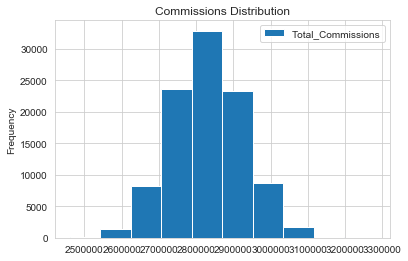

In [45]:
df.plot(kind='hist', title='Commissions Distribution')

In [46]:
df.describe()

,Total_Commissions
count,1.000000e+05
mean,2.831073e+06
std,9.627575e+04
min,2.461250e+06
25%,2.765500e+06
50%,2.830250e+06
75%,2.895250e+06
max,3.279250e+06


#### 2nd approach: creating a loop

In [11]:
def calc_commission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

In [14]:
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]

all_stats = []

# Loop through many simulations
for i in range(num_simulations):
    
    # Choose random inputs for the sales targets and percent to target that resemble their historical distribution
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps)
    
    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})
    
    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
    
    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
    
    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum(),  # total amount of sales in simulation i
                      df['Commission_Amount'].sum(),  # total commission in simulation i
                      df['Sales_Target'].sum()])   # total sales target in simulation i

In [15]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales', 'Commission_Amount', 'Sales_Target'])

In [16]:
results_df.describe().round(0).style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"100,000.0","100,000.0","100,000.0"
mean,"83,755,354.0","2,885,517.0","83,754,792.0"
std,"2,695,840.0","102,516.0","2,658,901.0"
min,"72,973,844.0","2,444,633.0","73,175,000.0"
25%,"81,919,140.0","2,815,402.0","81,950,000.0"
50%,"83,733,699.0","2,884,547.0","83,725,000.0"
75%,"85,541,731.0","2,953,601.0","85,525,000.0"
max,"97,317,402.0","3,411,924.0","96,500,000.0"


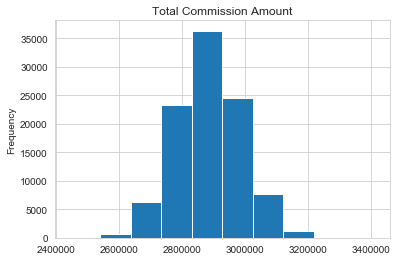

In [17]:
results_df['Commission_Amount'].plot(kind='hist', title="Total Commission Amount")

## Monte Carlo Method for Stock Price Prediction

https://www.kaggle.com/podsyp/monte-carlo-method-for-stock-price-prediction/notebook

MCS applied to a stock price using one of the most common models in finance: geometric Brownian motion (GBM) <br>  The stock price follows a series of steps, where each step is a drift plus or minus a random shock

In [2]:
!pip install pandas_datareader

In [4]:
import math
import matplotlib.pyplot as plt
from pandas_datareader import data

In [5]:
ibm = data.DataReader('IBM', 'yahoo',start='1/1/2000')

In [47]:
ibm

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,116.000000,111.875000,112.437500,116.000000,10347700.0,74.620827
2000-01-04,114.500000,110.875000,114.000000,112.062500,8227800.0,72.087906
2000-01-05,119.750000,112.125000,112.937500,116.000000,12733200.0,74.620827
2000-01-06,118.937500,113.500000,118.000000,114.000000,7971900.0,73.334274
2000-01-07,117.937500,110.625000,117.250000,113.500000,11856700.0,73.012619
...,...,...,...,...,...,...
2020-05-28,126.970001,124.220001,126.870003,124.529999,3915300.0,124.529999
2020-05-29,125.129997,122.239998,123.669998,124.900002,7930500.0,124.900002
2020-06-01,125.750000,124.029999,124.639999,124.889999,2871700.0,124.889999


***Model Creation***

In [8]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.investopedia.com/thmb/p7htEOv-Ci9_B8-u9Fg8Gi5Tn4Q=/450x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/CT-MonteCarlo3ra-5bfd939d4cedfd00260290de")

S=the stock price <br>
ΔS=the change in stock price <br>
μ=the expected return <br>
σ=the standard deviation of returns <br>
ϵ=the random variable <br>
Δt=the elapsed time period <br>

In [51]:
# time difference
time_elapsed = (ibm.index[-1] - ibm.index[0]).days

time_elapsed

7457

In [126]:
# however, we only have 5137 trading days in the data
# we'll assume that the time_elapsed is 5137
time_elapsed = ibm.shape[0]
time_elapsed

5137

In [128]:
price_ratio = (ibm['Adj Close'][-1] / ibm['Adj Close'][1])
inverse_number_of_years = 365.0 / time_elapsed

# mean returns, compound annual growth rate
cagr = price_ratio ** inverse_number_of_years - 1

In [129]:
# volatility or st.dev of returns 
vol = ibm['Adj Close'].pct_change().std()
vol

0.0166550475170513

In [130]:
number_of_trading_days = 5138
vol = vol * math.sqrt(number_of_trading_days)

In [131]:
print ("cagr (mean returns) : ", str(round(cagr,4)))
print ("vol (standard deviation of return : )", str(round(vol,4)))

cagr (mean returns) :  0.0422
vol (standard deviation of return : ) 1.1938


***Random value generation***

In [132]:
mu = cagr/number_of_trading_days #standardized over time
sigma = vol/math.sqrt(number_of_trading_days)  #standardized over time

daily_return_percentages = np.random.normal(mu, sigma, number_of_trading_days)+1

In [133]:
daily_return_percentages

array([1.01205479, 1.00835494, 1.02427289, ..., 1.01249349, 0.98051119,
       1.05787795])

In [134]:
# take the last stock price to create a stock price list using tte daily return percentages
price_series = [ibm['Adj Close'][-1]]

for drp in daily_return_percentages:
    price_series.append(price_series[-1] * drp)

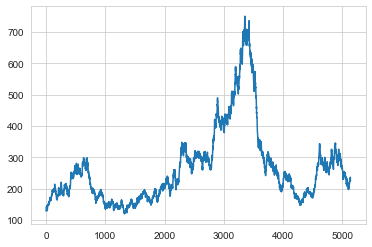

In [135]:
plt.plot(price_series)
plt.show()

***let's repeat this 1000 times***

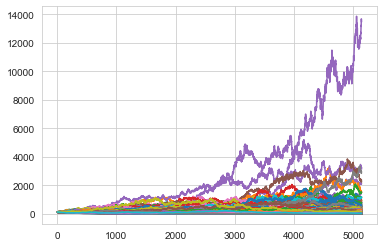

In [136]:
number_of_trials = 1000
for i in range(number_of_trials):
    daily_return_percentages = np.random.normal(mu, sigma, number_of_trading_days)+1
    price_series = [ibm['Adj Close'][-1]]

    for drp in daily_return_percentages:
        price_series.append(price_series[-1] * drp)
    
    plt.plot(price_series)
plt.show()

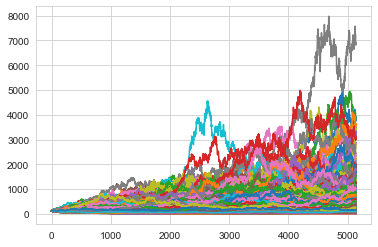

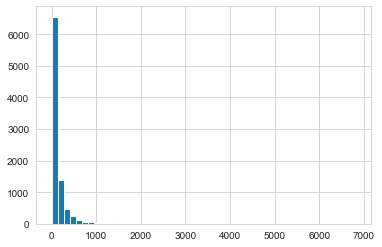

In [137]:
# ending price points is the stock price at the end period of each iteration
ending_price_points = []
larger_number_of_trials = 9001 
for i in range(larger_number_of_trials):
    daily_return_percentages = np.random.normal(mu, sigma, number_of_trading_days)+1
    price_series = [ibm['Adj Close'][-1]]

    for drp in daily_return_percentages:
        price_series.append(price_series[-1] * drp)
    
    plt.plot(price_series)
    
    ending_price_points.append(price_series[-1])

plt.show()

plt.hist(ending_price_points,bins=50)
plt.show()

***Results Analysis***

In [111]:
expected_ending_price_point = round(np.mean(ending_price_points),2)
print("Expected Ending Price Point : ", str(expected_ending_price_point))

Expected Ending Price Point :  130.74


In [112]:
population_mean = (cagr+1) * ibm['Adj Close'][-1]
print ("Sample Mean : ", str(expected_ending_price_point))
print ("Population Mean: ", str(round(population_mean,2)));
print ("Percent Difference : ", str(round((population_mean - expected_ending_price_point)/population_mean * 100,2)), "%")

Sample Mean :  130.74
Population Mean:  132.71
Percent Difference :  1.48 %


In [121]:
max(ending_price_points)

9427.572522101385

In [113]:
#Returns the q-th percentile(s) of the array elements
top_ten = np.percentile(ending_price_points,100-10)
bottom_ten = np.percentile(ending_price_points,10);
print ("Top 10% : ", str(round(top_ten,2)))
print ("Bottom 10% : ", str(round(bottom_ten,2)))

Top 10% :  305.64
Bottom 10% :  13.69


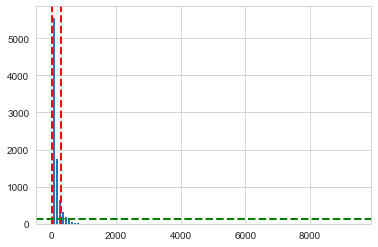

In [114]:
plt.hist(ending_price_points,bins=100)
plt.axvline(top_ten,color='r',linestyle='dashed',linewidth=2)
plt.axvline(bottom_ten,color='r',linestyle='dashed',linewidth=2)
plt.axhline(ibm['Adj Close'][-1],color='g', linestyle='dashed',linewidth=2)
plt.show()

## Monte Carlo simulation on AMD

https://towardsdatascience.com/python-risk-management-monte-carlo-simulations-7d41c891cb5

What is AMD options?
- A stock option is simply a contract that allows you to purchase or sell shares of stock (usually in blocks of 100 shares), for a certain period of time, for a certain price.

In [59]:
#Import Libraries
from scipy.stats import norm
%matplotlib inline

#Settings for Monte Carlo asset data, how long, and how many forecasts 
ticker = 'AMD' # stock ticker
t_intervals = 30 # time steps forecasted into future
iterations = 25 # amount of simulations


In [60]:
#Acquiring data
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2018-1-1')['Adj Close']
data

,AMD
Date,
2018-01-02,10.980000
2018-01-03,11.550000
2018-01-04,12.120000
2018-01-05,11.880000
2018-01-08,12.280000
...,...
2020-05-28,51.740002
2020-05-29,53.799999
2020-06-01,53.630001


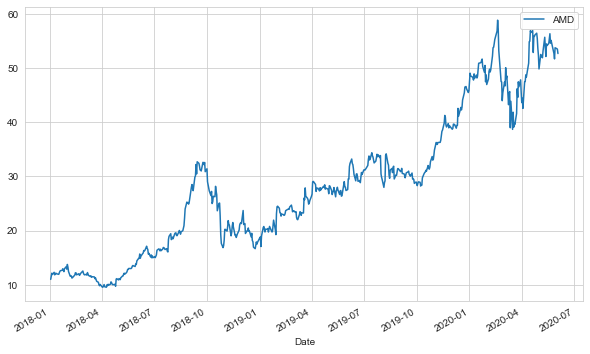

In [61]:
#Plot of asset historical closing price
data.plot(figsize=(10, 6));

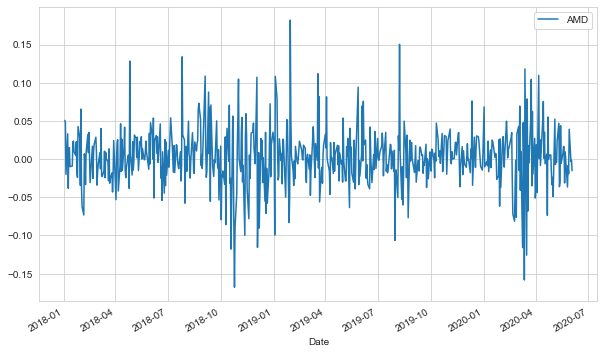

In [64]:
# returns = 1 + data.pct_change()
# Preparing log returns from data
log_returns = np.log(1 + data.pct_change())


#Plot of log returns
log_returns.plot(figsize = (10, 6))

 - The log returns are looking pretty good from the closing prices above. Now on to setting up the drift and random components.
 https://www.investopedia.com/articles/07/montecarlo.asp
 
 1. Take mean and variance of log_returns
 2. calculate the drift as for each time period the price will increase by the drift value of the expected return
 3. simulate the daily returns for a period of t_inervals=30 in a loop of iterations=25
 4. to estimate the future stock prices, take the last stock price to be your starting point
 5. price at period t * daily returns at period t+1 gives you the next day stock price
 5. do this in a loop of 25 iterations

Text(0.5, 1.0, '30 days Stock price prediction in 25 iterations')

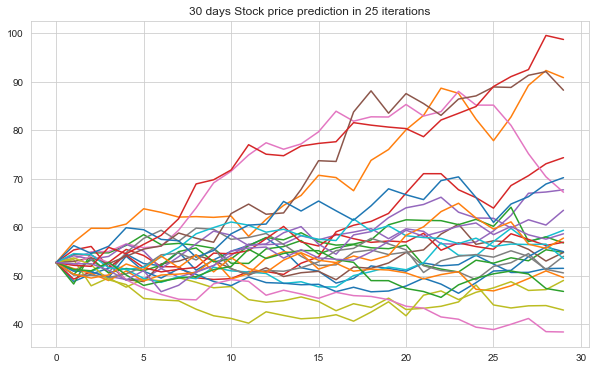

In [80]:
#Setting up drift and random component in relation to asset data
u = log_returns.mean()
var = log_returns.var()
# For each time period, our model assumes the price will "drift" up by the expected return.
drift = u - (0.5 * var)
# But the drift will be shocked (added or subtracted) by a random shock, which is the st.dev multiplied by a random number e
stdev = log_returns.std()

#norm.ppf is the pecent point function, which is the inverse of a cdf
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

#Takes last data point as startpoint point for simulation
S0 = data.iloc[-1]
price_list = np.zeros_like(daily_returns)
price_list[0] = S0
#Applies Monte Carlo simulation in asset
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

#Plot simulations
plt.figure(figsize=(10,6))
plt.plot(price_list)
plt.title('30 days Stock price prediction in 25 iterations')

Looks like the overall trend of AMD from the Monte Carlo simulations is up

## Using Monte Carlo to meausure Business Impact
https://medium.com/@thisismetis/what-is-a-monte-carlo-simulation-part-5-a9dc5dd1c77 <br>
http://www.zwmiller.com/projects/notebooks/optimizing_websites.html

- Let’s imagine that your company pays a consulting group to come in and optimize your website for audience retention. They run their analysis and proudly announce that they’ve found a way to direct 10% more traffic from your frequently asked questions page back to your main website.

- They’ve only optimized one page, and they haven’t optimized on sales but on audience retention. How does this actually change your bottom line overall? Is it a 10% increase? Is it even a noticeable increase at all? How can you convert their optimization back to monetary gain?

In [139]:
import scipy
import sklearn
import sys
import matplotlib

libraries = (('Matplotlib', matplotlib), ('Numpy', np), ('Pandas', pd))

print("Python Version:", sys.version, '\n')
for lib in libraries:
    print('{0} Version: {1}'.format(lib[0], lib[1].__version__))

Python Version: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)] 

Matplotlib Version: 3.1.2
Numpy Version: 1.18.1
Pandas Version: 1.0.0


The CTR Matrix:
- represents a website for a business
- The site has a landing home page, a Frequently Asked Questions (FAQ) page, a product page (where it lists the sale products), and then pages for the two products the business offers. Each product can only be purchased from the product page. Now what do the numbers mean?
- Each row lists the connection probability between pages. So in row 0 (our first row) that's the rate of connection to each page coming from the outside internet. So that 0.4 in row 0, column 1 tells us that 40% of the time, people coming from the outside internet land on the home page. row 1 is our home page, so we see that in column 0 there's a 40% chance that someone on the home page leaves our website back to the internet at large. 
- In column 2 of row 1, we see that there's a 15% chance that someone on our home page goes to the FAQ page. That's the logic that we have here. 
- The reason the "purchase item 1" only can be connected to by "item 1 page" is that we only allow users to buy an item from one specific page. The "purchase" rows have no connections, because we're going to count that as an end point for now.


In [5]:
# a symmetric x8 matrix
CTR  = [[0., 0.4, 0.2, 0.1, 0.15, 0.15, 0.0, 0.0], # Not our page or outside page
        [0.4, 0., 0.15, 0.15, 0.15, 0.15, 0.0, 0.0], # home page
        [0.6, 0.15, 0., 0.25, 0.0, 0.0, 0.0, 0.0], # FAQ
        [0.4, 0.1, 0.05, 0., 0.25, 0.2, 0.0, 0.0], # product page
        [0.4, 0.1, 0.05, 0.1, 0., 0.2, 0.15, 0.], # item 1 page
        [0.4, 0.1, 0.05, 0.1, 0.2, 0., 0., 0.15], # item 2 page
        [0., 0., 0., 0., 0., 0., 0., 0.], # purchase item 1
        [0., 0., 0., 0., 0., 0., 0., 0.]] # purchase item 2

cols = ["Internet", "Home", "FAQ", "Products", "Item 1", "Item 2", "Purchase 1", "Purchase 2"]
df = pd.DataFrame(CTR, columns=cols)
df.index = cols
df

,Internet,Home,FAQ,Products,Item 1,Item 2,Purchase 1,Purchase 2
Internet,0.0,0.40,0.20,0.10,0.15,0.15,0.00,0.00
Home,0.4,0.00,0.15,0.15,0.15,0.15,0.00,0.00
FAQ,0.6,0.15,0.00,0.25,0.00,0.00,0.00,0.00
Products,0.4,0.10,0.05,0.00,0.25,0.20,0.00,0.00
Item 1,0.4,0.10,0.05,0.10,0.00,0.20,0.15,0.00
Item 2,0.4,0.10,0.05,0.10,0.20,0.00,0.00,0.15
Purchase 1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Purchase 2,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


- Now let's write a function that simulates a user experience. The user will start off in the internet at large. We'll roll a dice to figure out what page they go to, based on the likelihoods that we know from our tracking of the website's analytics.

- After the user lands on some page, we'll go to the row for that page, roll a dice to see where they go next. We'll repeat this until they leave the site or purchase something. If they purchase something, we'll return the amount of money we've gained. If they bounce, we'll return no

In [147]:
cost_of_item_1 = 100
cost_of_item_2 = 75
possible_clicks = np.arange(8)

def simulate_user(CTR, debug=False):  
    user_page = 0 # start in the internet at large
    
    while True: # stop if the user is purchasing or leaving
        # generates a random sample from a given array
        user_page = np.random.choice(possible_clicks, p=CTR[user_page])
        if debug:
            print(user_page)
        if user_page in [0,6,7]:
            break
    
    if user_page == 6:
        return cost_of_item_1
    elif user_page == 7:
        return cost_of_item_2
    else:
        return 0
    
simulate_user(CTR, debug=True)

4
3
1
4
5
0


0

- Now that we have that ability, let's see how much money we make if we have 10,000 users come in. We'll also track how we're getting our money by seeing how often people purchase each item and how often they bounce.

In [149]:
money = 0.
bounces = 0.
item1_purchases = 0.
item2_purchases = 0.

number_of_users = 10000

for _ in range(number_of_users):
    user_result = simulate_user(CTR)
    money += float(user_result)
    if user_result == cost_of_item_1:
        item1_purchases += 1.
    elif user_result == cost_of_item_2:
        item2_purchases += 1.
    else:
        bounces += 1
        
print("Revenue: ", money)
print("Bounce Rate: ", bounces/number_of_users)
print("Item 1 Purchase Rate: ", item1_purchases/number_of_users)
print("Item 2 Purchase Rate: ", item2_purchases/number_of_users)

Revenue:  103800.0
Bounce Rate:  0.8813
Item 1 Purchase Rate:  0.0591
Item 2 Purchase Rate:  0.0596


- That was only one set of 10,000 users. To make sure we're getting a good idea of things (and that we are seeing a statistically relevant output), let's make that into a function and cycle through a bunch of user sets (note, for computational purposes, I'm going to turn it down to 1000 users per cycle)
- OR let's create more sets/cycles/iterations with 1000 users each

In [150]:
def measure_revenue(CTR, number_of_users = 10000):
    money = 0.
    bounces = 0.
    item1_purchases = 0.
    item2_purchases = 0.
    
    for _ in range(number_of_users):
        user_result = simulate_user(CTR)
        money += float(user_result)
        if user_result == cost_of_item_1:
            item1_purchases += 1.
        elif user_result == cost_of_item_2:
            item2_purchases += 1.
        else:
            bounces += 1
    return money, bounces, item1_purchases, item2_purchases

track_revenue = []
track_item1 = []
track_item2 = []
track_bounces = []

number_of_user_groups = 1000
number_of_users = 1000
for _ in range(number_of_user_groups):
    money, bounces, item1_purchases, item2_purchases = measure_revenue(CTR, number_of_users=number_of_users)
    track_revenue.append(money)
    track_item1.append(item1_purchases)
    track_item2.append(item2_purchases)
    track_bounces.append(bounces)

Average Revenue/user:  10.316475
Average Bounce Rate:  0.882447
Average Item 1 Purchases:  0.06
Average Item 2 Purchases:  0.057553


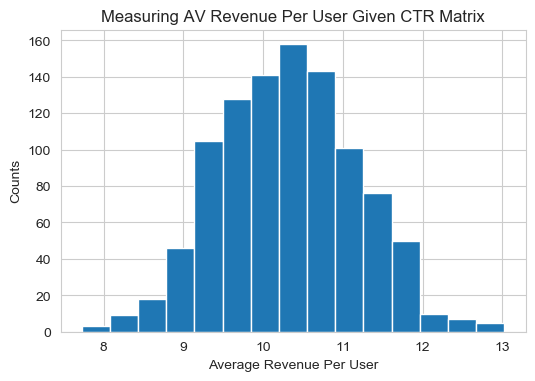

In [155]:
# users per cycle = 1000
print("Average Revenue/user: ", np.mean(track_revenue)/number_of_users)
print("Average Bounce Rate: ", np.mean(track_bounces)/number_of_users)
print("Average Item 1 Purchases: ", np.mean(track_item1)/number_of_users)
print("Average Item 2 Purchases: ", np.mean(track_item2)/number_of_users)

plt.figure(dpi=100)
plt.hist(np.array(track_revenue)/number_of_users, bins=15);
plt.xlabel("Average Revenue Per User");
plt.ylabel("Counts")
plt.title("Measuring AV Revenue Per User Given CTR Matrix");

- Nice. Given the current design of our website, it looks like roughly 11% (100-av bounce rate) of people that come to our page buy something. 

- Now let's imagine you go to your marketing team, you hire an analyst that's going to optimize click-through-rate trends, do some A/B testing, and then update your page. Let's even imagine you get a pretty good analyst, and he manages to find some flaws in your FAQ page design. At the end of the day, he finds that he can update your page such that your bounce rate on your FAQ page drops by 10%, and is redistributed to the home page (8%) and your product page (2%). That sounds like a huge move, right?

- A 10% retention gain is uncommonly large for a CTR analysis. But what impact does that have on the bottom line? Well, let's modify our CTR Matrix to account for that, then simulate this again.

In [6]:
CTR2  = [[0., 0.4, 0.2, 0.1, 0.15, 0.15, 0.0, 0.0], # Not our page
        [0.4, 0., 0.15, 0.15, 0.15, 0.15, 0.0, 0.0], # home page
        [0.5, 0.23, 0., 0.27, 0.0, 0.0, 0.0, 0.0], # FAQ      #0.5 changed from 0.6, 0.23 changed from 0.15 and 0.27 changed from 0.25
        [0.4, 0.1, 0.05, 0., 0.25, 0.2, 0.0, 0.0], # product page
        [0.4, 0.1, 0.05, 0.1, 0., 0.2, 0.15, 0.], # item 1 page
        [0.4, 0.1, 0.05, 0.1, 0.2, 0., 0., 0.15], # item 2 page
        [0., 0., 0., 0., 0., 0., 0., 0.], # purchase item 1
        [0., 0., 0., 0., 0., 0., 0., 0.]] # purchase item 2

possible_clicks = np.arange(8)
df = pd.DataFrame(CTR2, columns=cols)
df.index = cols
df

,Internet,Home,FAQ,Products,Item 1,Item 2,Purchase 1,Purchase 2
Internet,0.0,0.40,0.20,0.10,0.15,0.15,0.00,0.00
Home,0.4,0.00,0.15,0.15,0.15,0.15,0.00,0.00
FAQ,0.5,0.23,0.00,0.27,0.00,0.00,0.00,0.00
Products,0.4,0.10,0.05,0.00,0.25,0.20,0.00,0.00
Item 1,0.4,0.10,0.05,0.10,0.00,0.20,0.15,0.00
Item 2,0.4,0.10,0.05,0.10,0.20,0.00,0.00,0.15
Purchase 1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Purchase 2,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [157]:
track_revenue_2 = []
track_item1_2 = []
track_item2_2 = []
track_bounces_2 = []

number_of_user_groups = 1000
number_of_users = 1000
for _ in range(number_of_user_groups):
    money, bounces, item1_purchases, item2_purchases = measure_revenue(CTR2, number_of_users=number_of_users)
    track_revenue_2.append(money)
    track_item1_2.append(item1_purchases)
    track_item2_2.append(item2_purchases)
    track_bounces_2.append(bounces)

Average Revenue/user:  10.540149999999999
Average Bounce Rate:  0.8798339999999999
Average Item 1 Purchases:  0.061107999999999996
Average Item 2 Purchases:  0.059058


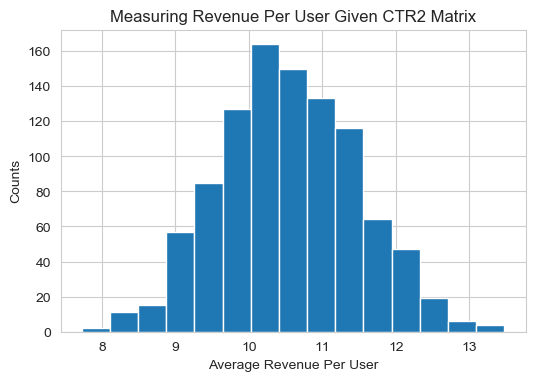

In [159]:
print("Average Revenue/user: ", np.mean(track_revenue_2)/number_of_users)
print("Average Bounce Rate: ", np.mean(track_bounces_2)/number_of_users)
print("Average Item 1 Purchases: ", np.mean(track_item1_2)/number_of_users)
print("Average Item 2 Purchases: ", np.mean(track_item2_2)/number_of_users)

plt.figure(dpi=100)
plt.hist(np.array(track_revenue_2)/number_of_users, bins=15);
plt.xlabel("Average Revenue Per User");
plt.ylabel("Counts")
plt.title("Measuring AV Revenue Per User Given CTR2 Matrix");

- compare the shift histogram

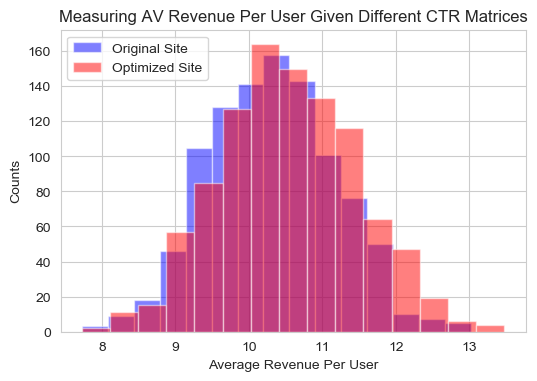

In [161]:
plt.figure(dpi=100)
plt.hist(np.array(track_revenue)/number_of_users, bins=15, color='b', alpha=0.5, label="Original Site");
plt.hist(np.array(track_revenue_2)/number_of_users, bins=15, color='r', alpha=0.5, label="Optimized Site");
plt.xlabel("Average Revenue Per User");
plt.ylabel("Counts")
plt.legend(loc="upper left")
plt.title("Measuring AV Revenue Per User Given Different CTR Matrices");

At the end of the day, we found that even though there was a 10% increase in audience retention, we only see a roughly 2% shift in the mean, and that result might not even be statistically significant compared to the randomness inherent in audience reactions.